### Dimensionality Reduction Review
##### 12Dec18
Using proportional downsampling techniques, get subsets of discrete and continous data to feature-select prior to running DR algorithms for comparison on relatively low-dimensional raw data.

In [2]:
import sys
from fcc_DRs import *
from fcc_utils import *

Using TensorFlow backend.


In [81]:
# reload functions when editing file
del sys.modules['fcc_DRs']
from fcc_DRs import *

In [101]:
# reload functions when editing file
del sys.modules['fcc_utils']
from fcc_utils import *

Continue work from `checkpoint_07Dec18.ipynb` using 'qi' dataset as continuous example

---
#### 5. Repeat for continuous dataset

In [86]:
%time qi = RNA_counts.from_file('inputs/qi_s1_edited_all.csv.gz', cells_axis=0, labels=[None,None])

CPU times: user 15.7 s, sys: 1.07 s, total: 16.7 s
Wall time: 17.3 s


In [87]:
qi.data.shape

(1595, 25507)

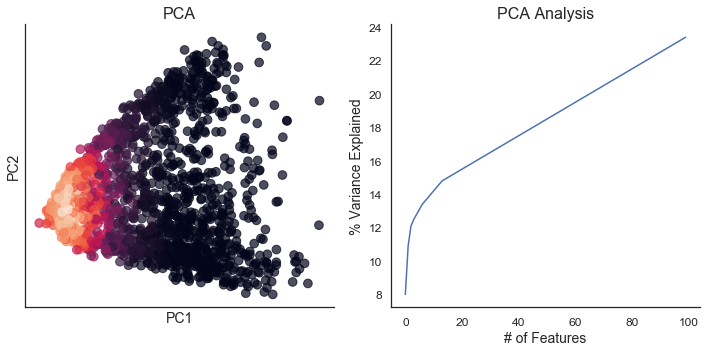

CPU times: user 8.43 s, sys: 941 ms, total: 9.37 s
Wall time: 5.76 s


In [7]:
%%time
qi_PCA = fcc_PCA(qi.arcsinh_norm(), n_components=100)
qi_PCA.plot()

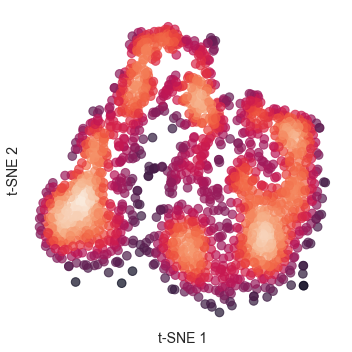

CPU times: user 11.2 s, sys: 350 ms, total: 11.6 s
Wall time: 11.4 s


In [8]:
%%time
qi_tSNE = fcc_tSNE(qi_PCA.results, perplexity=30)
qi_tSNE.plot()

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x126563160>)

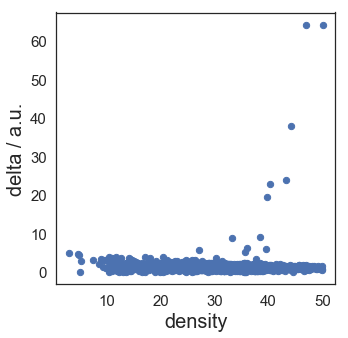

In [9]:
qi_tSNE.clu.draw_decision_graph()

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1264d0fd0>)

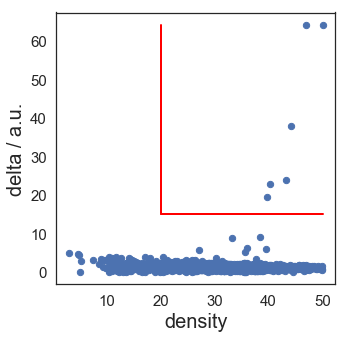

In [10]:
qi_tSNE.clu.assign(20, 15)
qi_tSNE.clu.draw_decision_graph(min_delta=qi_tSNE.clu.min_delta, min_density=qi_tSNE.clu.min_density)

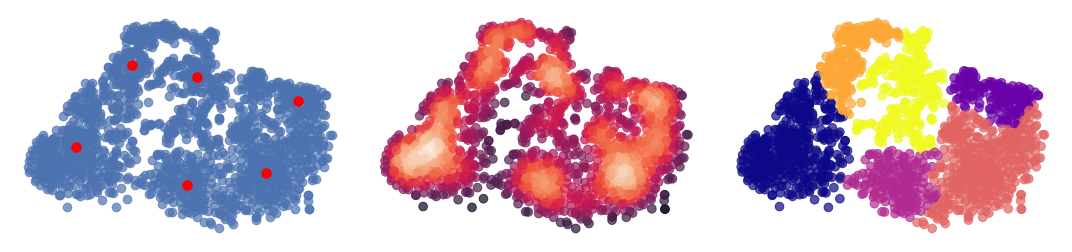

In [11]:
qi_tSNE.plot_clusters()

In [12]:
qi_tSNE.silhouette_score

0.38457268

---
select most variable genes

In [88]:
qi_select = RNA_counts.var_select(counts_obj=qi, n_features=500)

In [89]:
qi_select.data.shape # now we should have 500 genes and ~1000 cells

(1595, 500)

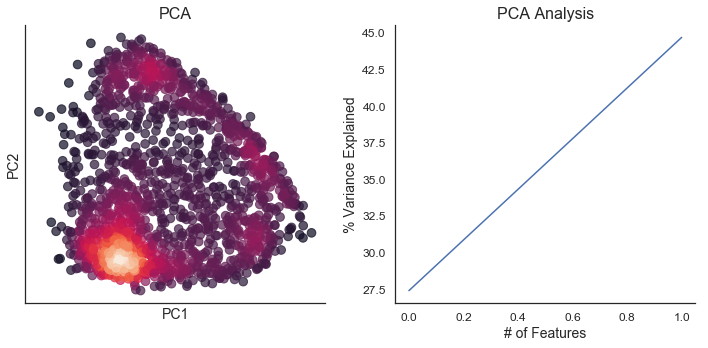

CPU times: user 1.13 s, sys: 199 ms, total: 1.33 s
Wall time: 855 ms


In [90]:
%%time
qi_select_PCA_2 = fcc_PCA(qi_select.arcsinh_norm(), n_components=2)
qi_select_PCA_2.plot()

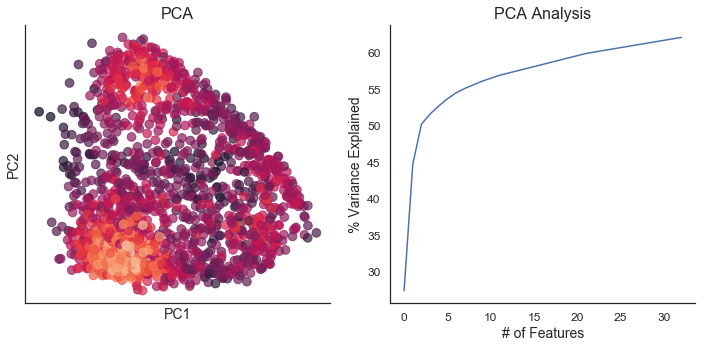

CPU times: user 1.13 s, sys: 98.9 ms, total: 1.23 s
Wall time: 724 ms


In [91]:
%%time
# 33-component PCA to compare to DCA
qi_select_PCA_33 = fcc_PCA(qi_select.arcsinh_norm(), n_components=33)
qi_select_PCA_33.plot()

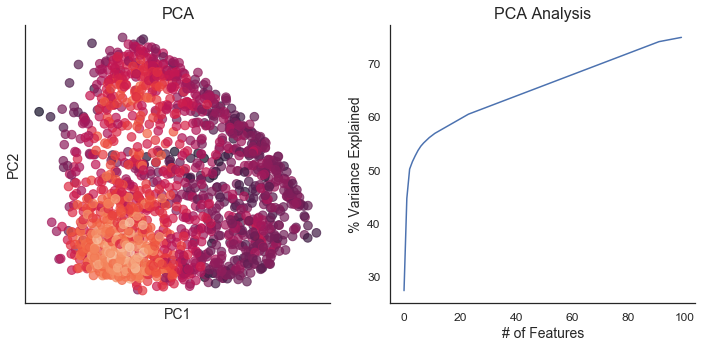

CPU times: user 1.28 s, sys: 109 ms, total: 1.39 s
Wall time: 879 ms


In [92]:
%%time
# 100-component PCA to compare to DCA
qi_select_PCA_100 = fcc_PCA(qi_select.arcsinh_norm(), n_components=100)
qi_select_PCA_100.plot()

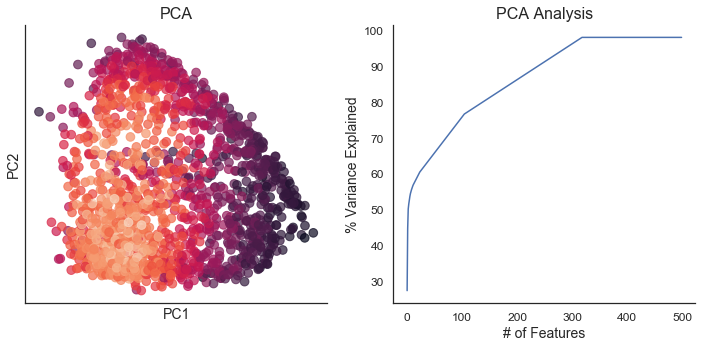

CPU times: user 2.21 s, sys: 459 ms, total: 2.67 s
Wall time: 2.46 s


In [113]:
%%time
# 100-component PCA to compare to DCA
qi_select_PCA_100 = fcc_PCA(qi_select.arcsinh_norm(), n_components=500)
qi_select_PCA_100.plot()

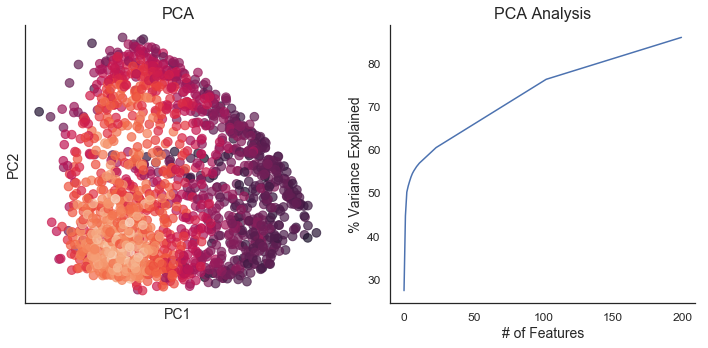

CPU times: user 1.5 s, sys: 123 ms, total: 1.62 s
Wall time: 1.04 s


In [93]:
%%time
# 200-component PCA to compare to DCA
qi_select_PCA_200 = fcc_PCA(qi_select.arcsinh_norm(), n_components=200)
qi_select_PCA_200.plot()

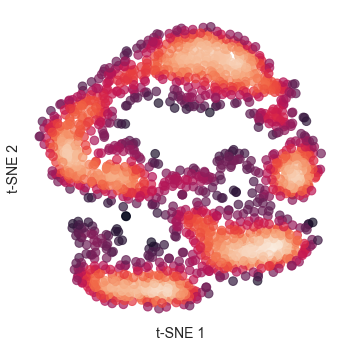

CPU times: user 12.2 s, sys: 554 ms, total: 12.8 s
Wall time: 12.7 s


In [94]:
%%time
qi_select_tSNE = fcc_tSNE(qi_select.arcsinh_norm(), perplexity=30)
qi_select_tSNE.plot()

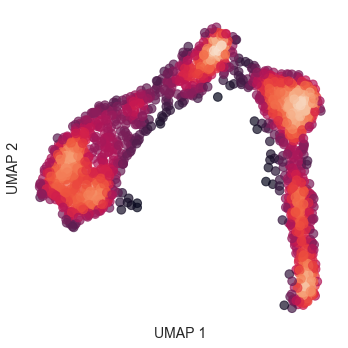

CPU times: user 4.8 s, sys: 311 ms, total: 5.11 s
Wall time: 4.96 s


In [95]:
%%time
qi_select_UMAP = fcc_UMAP(qi_select.arcsinh_norm(), perplexity=30)
qi_select_UMAP.plot()

In [96]:
%%time
# perform DCA to reduce to 33 features
qi_select_DCA = fcc_DCA(qi_select.counts, norm=False)

DCA: Successfully preprocessed 500 genes and 1595 cells.
Calculating low dimensional representations...
Calculating reconstructions...
CPU times: user 36 s, sys: 2.61 s, total: 38.6 s
Wall time: 23.6 s


---
Perform Euclidean distance comparisons

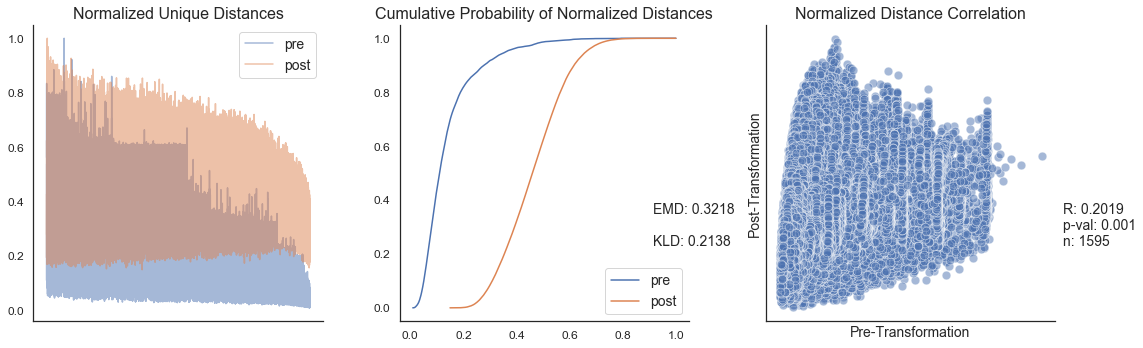

CPU times: user 1min 12s, sys: 10.9 s, total: 1min 23s
Wall time: 1min 23s


In [97]:
# 100-component PCA
%time mantel, EMD, KLD = compare_euclid(pre=qi_select.distance_matrix(), post=qi_select_PCA_100.distance_matrix())

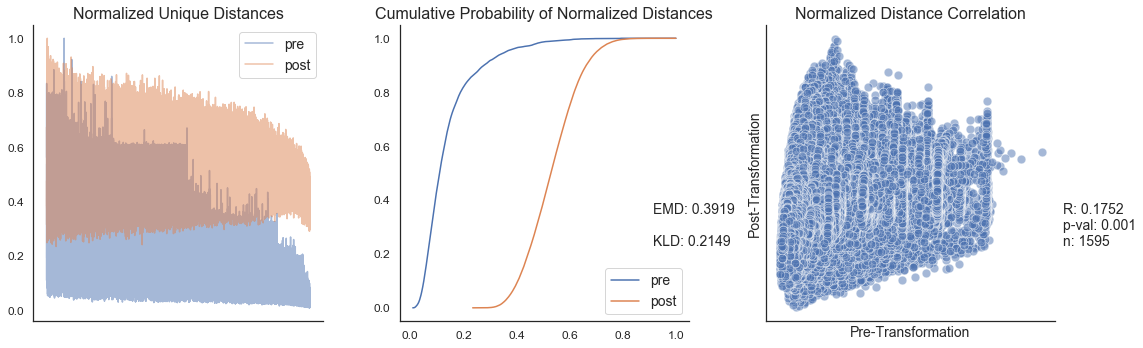

CPU times: user 1min 18s, sys: 13.5 s, total: 1min 32s
Wall time: 1min 35s


In [114]:
# 500-component PCA
%time mantel, EMD, KLD = compare_euclid(pre=qi_select.distance_matrix(), post=qi_select_PCA_100.distance_matrix())

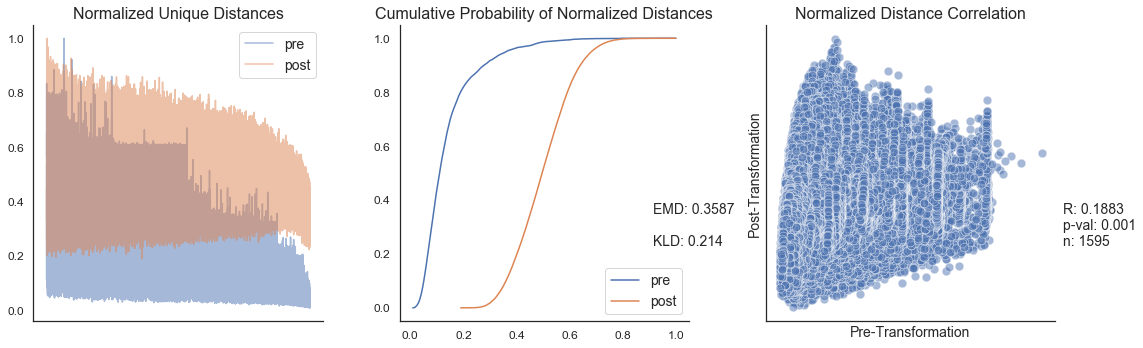

CPU times: user 1min 13s, sys: 12 s, total: 1min 25s
Wall time: 1min 25s


In [98]:
# 200-component PCA
%time mantel, EMD, KLD = compare_euclid(pre=qi_select.distance_matrix(), post=qi_select_PCA_200.distance_matrix())

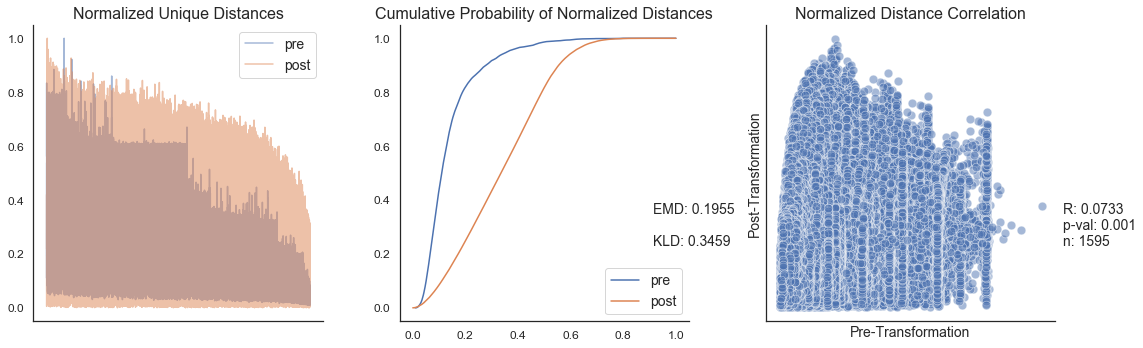

CPU times: user 1min 12s, sys: 12.5 s, total: 1min 25s
Wall time: 1min 25s


In [99]:
# 2-component PCA
%time mantel, EMD, KLD = compare_euclid(pre=qi_select.distance_matrix(), post=qi_select_PCA_2.distance_matrix())

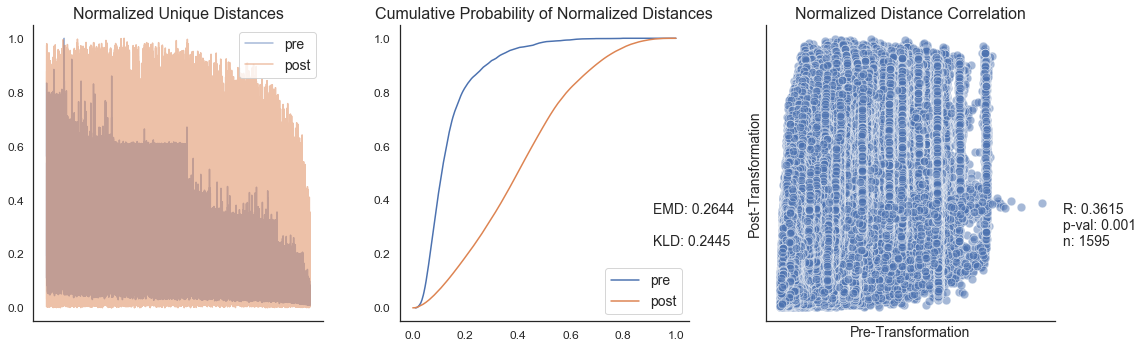

CPU times: user 1min 17s, sys: 11.4 s, total: 1min 28s
Wall time: 1min 28s


In [109]:
# t-SNE
%time mantel, EMD, KLD = compare_euclid(pre=qi_select.distance_matrix(), post=qi_select_tSNE.distance_matrix())

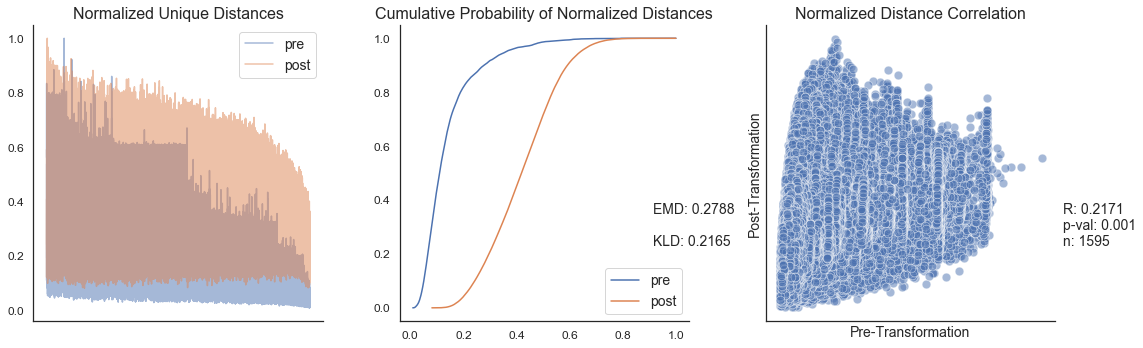

CPU times: user 1min 12s, sys: 11.7 s, total: 1min 24s
Wall time: 1min 24s


In [110]:
# 33-component PCA
%time mantel, EMD, KLD = compare_euclid(pre=qi_select.distance_matrix(), post=qi_select_PCA_33.distance_matrix())

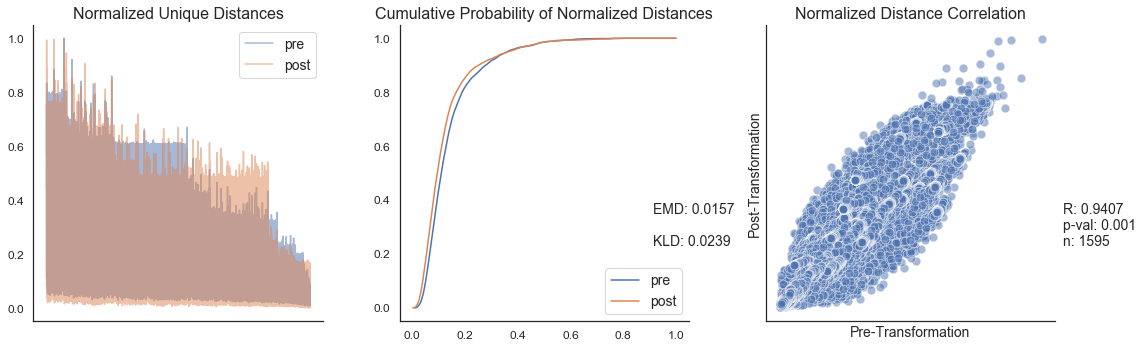

CPU times: user 1min 15s, sys: 12.4 s, total: 1min 27s
Wall time: 1min 28s


In [112]:
# DCA
%time mantel, EMD, KLD = compare_euclid(pre=qi_select.distance_matrix(), post=qi_select_DCA.distance_matrix())

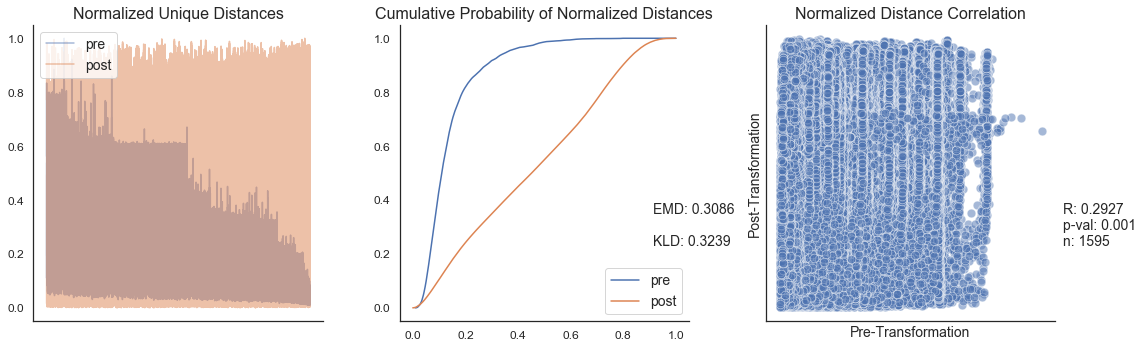

CPU times: user 1min 20s, sys: 12.9 s, total: 1min 33s
Wall time: 1min 37s


In [111]:
%time mantel, EMD, KLD = compare_euclid(pre=qi_select.distance_matrix(), post=qi_select_UMAP.distance_matrix())

---
Try Knn graph comparison

In [102]:
%time knn_preservation(qi_select.knn_graph(30), qi_select_PCA_2.knn_graph(30))

CPU times: user 9.29 s, sys: 2.14 s, total: 11.4 s
Wall time: 11.5 s


96.8628

In [103]:
%time knn_preservation(qi_select.knn_graph(30), qi_select_PCA_100.knn_graph(30))

CPU times: user 11.1 s, sys: 2.42 s, total: 13.5 s
Wall time: 13.8 s


97.1617

In [104]:
%time knn_preservation(qi_select.knn_graph(30), qi_select_PCA_200.knn_graph(30))

CPU times: user 12 s, sys: 2.75 s, total: 14.7 s
Wall time: 14.9 s


97.1638

In [105]:
%time knn_preservation(qi_select.knn_graph(30), qi_select_PCA_33.knn_graph(30))

CPU times: user 10.7 s, sys: 2.3 s, total: 13 s
Wall time: 13.2 s


97.1716

In [106]:
%time knn_preservation(qi_select.knn_graph(30), qi_select_DCA.knn_graph(30))

CPU times: user 12.6 s, sys: 2.71 s, total: 15.4 s
Wall time: 15.5 s


98.1818

In [107]:
%time knn_preservation(qi_select.knn_graph(30), qi_select_tSNE.knn_graph(30))

CPU times: user 9.23 s, sys: 2.14 s, total: 11.4 s
Wall time: 11.4 s


97.0683

In [108]:
%time knn_preservation(qi_select.knn_graph(30), qi_select_UMAP.knn_graph(30))

CPU times: user 9.21 s, sys: 2.17 s, total: 11.4 s
Wall time: 11.5 s


96.637

---
#### 6. NVR selection on continuous dataset

In [94]:
%time qi_NVR = RNA_counts.nvr_select(counts_obj=qi, scale=1000)

Start min_conn_k
2 connections needed
Finished min_conn_k 
Start traj_dist
Finished traj_dist
Start adaptive_knn_graph
Finished adaptive_knn_graph
Start global variance calculation
Finished global variance calculation
Start neighborhood variance calculation
Completion:
Finished neighborhood variance calculation
Start global to neighborhood variance ratio calculation
Finished global to neighborhood variance ratio calculation
Finished selection_val
Finished gene selection in 364.050167798996 seconds
done

Selected 157 variable genes

CPU times: user 6min 2s, sys: 2.25 s, total: 6min 5s
Wall time: 6min 6s


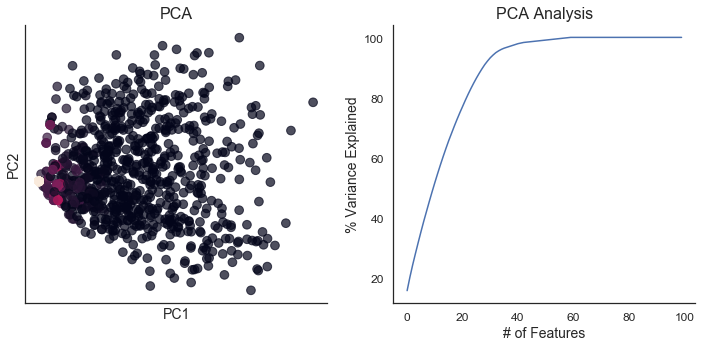

CPU times: user 877 ms, sys: 82.7 ms, total: 960 ms
Wall time: 531 ms


In [109]:
%%time
qi_NVR_PCA_100 = fcc_PCA(qi_NVR.arcsinh_norm(), n_components=100)
qi_NVR_PCA_100.plot()

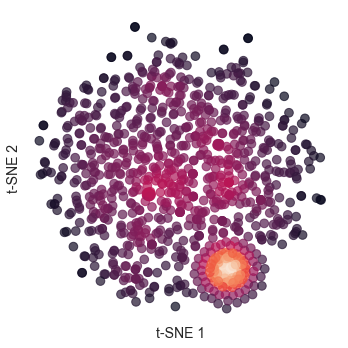

CPU times: user 6.84 s, sys: 266 ms, total: 7.11 s
Wall time: 6.94 s


In [110]:
%%time
qi_NVR_PCAtSNE = fcc_tSNE(qi_NVR_PCA_100.results, perplexity=30)
qi_NVR_PCAtSNE.plot()

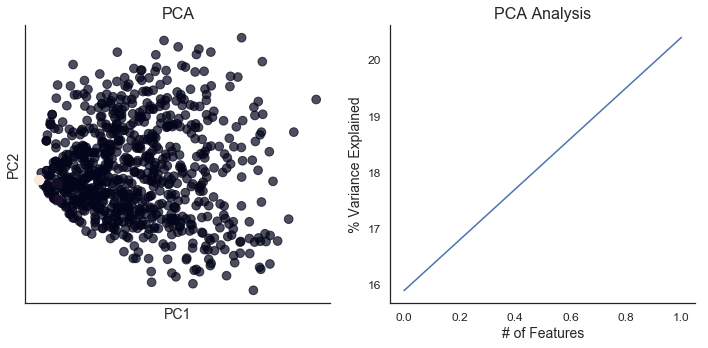

CPU times: user 745 ms, sys: 70.7 ms, total: 816 ms
Wall time: 451 ms


In [98]:
%%time
qi_NVR_PCA_2 = fcc_PCA(qi_NVR.arcsinh_norm(), n_components=2)
qi_NVR_PCA_2.plot()

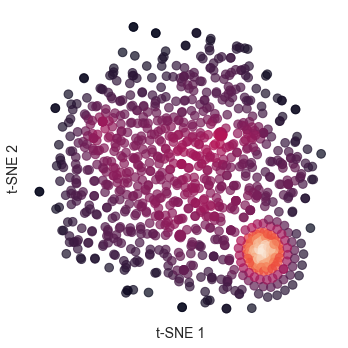

CPU times: user 7.39 s, sys: 273 ms, total: 7.67 s
Wall time: 7.52 s


In [99]:
%%time
qi_NVR_tSNE = fcc_tSNE(qi_NVR.arcsinh_norm(), perplexity=30)
qi_NVR_tSNE.plot()

/Users/cody/.virtualenvs/lau_lab/lib/python3.6/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/Users/cody/.virtualenvs/lau_lab/lib/python3.6/site-packages/umap/umap_.py:926: RuntimeWarning: invalid value encountered in less
  graph.data[graph.data < (graph.data.max() / float(n_epochs))] = 0.0


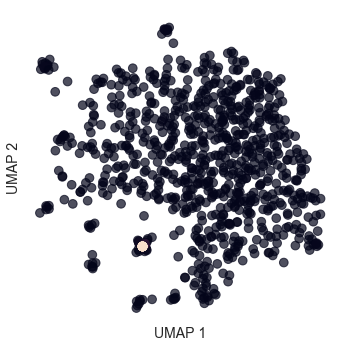

CPU times: user 2.47 s, sys: 145 ms, total: 2.61 s
Wall time: 2.4 s


In [100]:
%%time
qi_NVR_UMAP = fcc_UMAP(qi_NVR.arcsinh_norm(), perplexity=30)
qi_NVR_UMAP.plot()

Now perform Euclidean distance comparisons

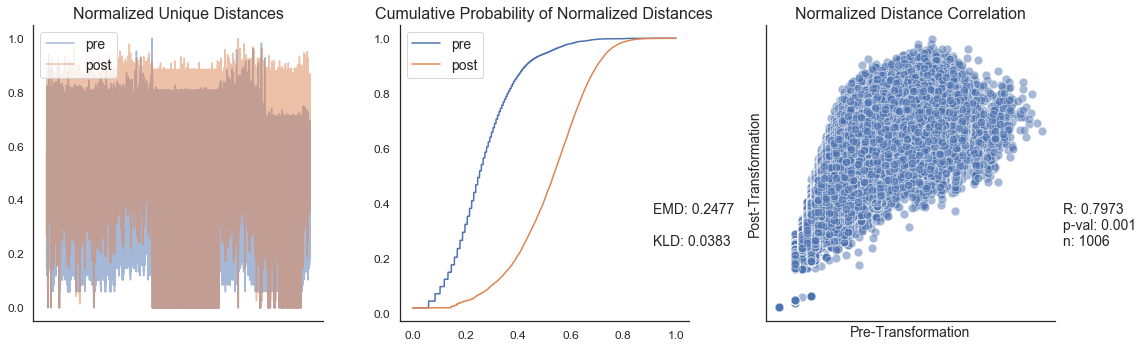

CPU times: user 24.8 s, sys: 3.33 s, total: 28.1 s
Wall time: 27.7 s


In [101]:
# 100-component PCA
%time mantel, EMD, KLD = compare_euclid(pre=qi_NVR.distance_matrix(), post=qi_NVR_PCA_100.distance_matrix())

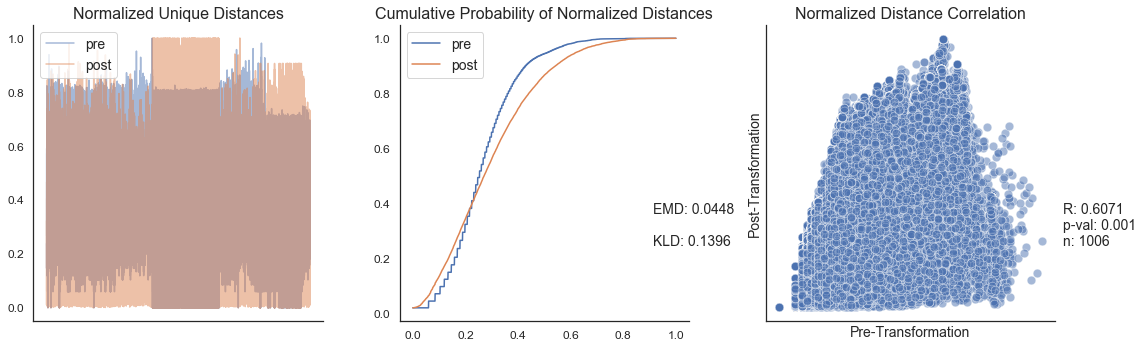

CPU times: user 24.6 s, sys: 3.3 s, total: 27.9 s
Wall time: 27.4 s


In [102]:
# 2-component PCA
%time mantel, EMD, KLD = compare_euclid(pre=qi_0_NVR.distance_matrix(), post=qi_0_NVR_PCA_2.distance_matrix())

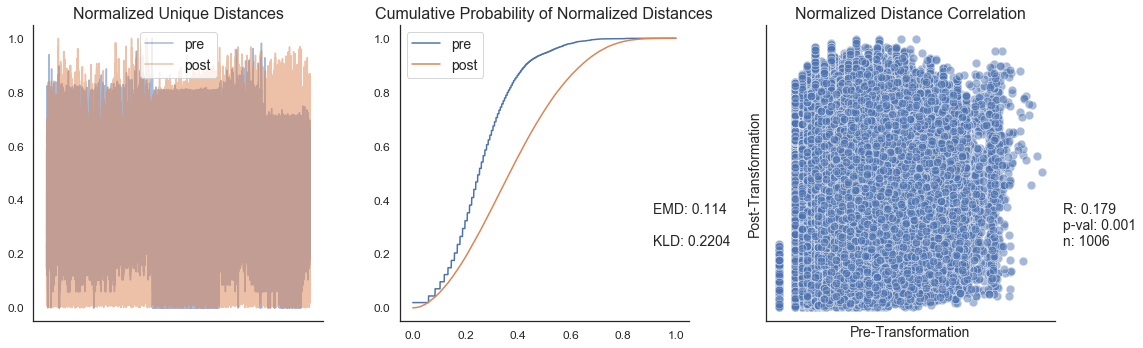

CPU times: user 24.6 s, sys: 3.26 s, total: 27.8 s
Wall time: 27.2 s


In [103]:
# t-SNE on downsampled, feature-selected data
%time mantel, EMD, KLD = compare_euclid(pre=qi_0_NVR.distance_matrix(), post=qi_0_NVR_tSNE.distance_matrix())

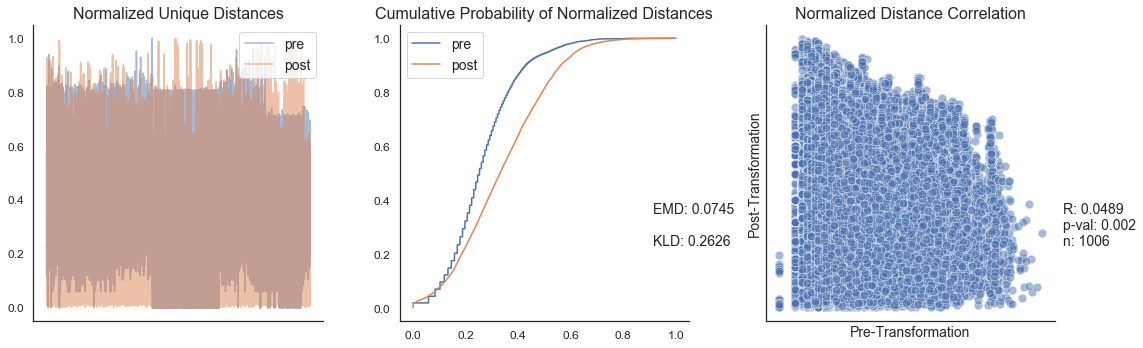

CPU times: user 24.3 s, sys: 2.73 s, total: 27.1 s
Wall time: 26.4 s


In [104]:
# UMAP on downsampled, feature-selected data
%time mantel, EMD, KLD = compare_euclid(pre=qi_0_NVR.distance_matrix(), post=qi_0_NVR_UMAP.distance_matrix())

---

In [1]:
from scvi.dataset import CsvDataset
import urllib

In [2]:
# Loading a local dataset into scVI
colon1_scVI = CsvDataset('GSM2743164_rep1_colon_rnaseq.csv.gz', 
                               save_path='inputs/', 
                               compression='gzip') 

AttributeError: 'NoneType' object has no attribute 'timeout'

#### Training scVI
* __n_epochs__: Maximum number of epochs to train the model. If the likelihood change is small than a set threshold training will stop automatically. 
* __lr__: learning rate. Set to 0.001 here. 
* __use_batches__: If the value of true than batch information is used in the training. Here it is set to false because the data only contains one batch. 
* __use_cuda__: Set to true to use CUDA. 


In [4]:
from scvi.models import *
from scvi.inference import UnsupervisedTrainer
n_epochs=400 
lr=1e-3
use_batches=False
use_cuda=True

%matplotlib inline

**Train the model and output model likelihood every 5 epochs**

In [5]:
vae = VAE(colon1_scVI.nb_genes, n_batch=colon1_scVI.n_batches * use_batches)
trainer = UnsupervisedTrainer(vae,
                              colon1_scVI,
                              train_size=0.75,
                              use_cuda=use_cuda,
                              frequency=5)
trainer.train(n_epochs=n_epochs, lr=lr)

training: 100%|███████████████████████████████████████████████████████████████████████████████████| 400/400 [02:29<00:00,  2.59it/s]


**Plotting the likelihood change across the 500 epochs of training: blue for training error and orange for testing error.**

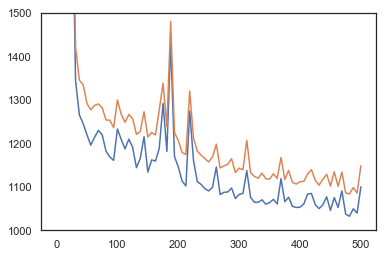

In [6]:
ll_train_set = trainer.history["ll_train_set"]
ll_test_set = trainer.history["ll_test_set"]
x = np.linspace(0,500,(len(ll_train_set)))
plt.plot(x, ll_train_set)
plt.plot(x, ll_test_set)
plt.ylim(1000,1500)
plt.show()

In [7]:
type(trainer.test_set).__name__

'Posterior'

In [62]:
trainer.train_set.raw_data()[0] # I think this is the counts? At least for the training set.

array([[192.,  70.,   0., ...,   5.,   4.,   5.],
       [615., 348., 161., ...,   4.,   4.,   3.],
       [370., 118.,  30., ...,   3.,   1.,   2.],
       ...,
       [ 18.,  13.,   2., ...,   1.,   0.,   1.],
       [  4., 335.,   3., ...,   0.,   2.,   1.],
       [  3.,   0.,   1., ...,   0.,   0.,   2.]], dtype=float32)

In [68]:
colon1_scVI_preprocessed = RNA_counts(data=colon1_scVI.X.astype('double'), labels=[None,None])

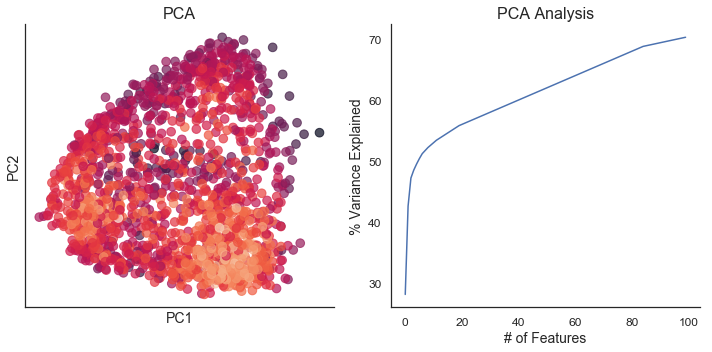

In [71]:
colon1_scVI_PCA = fcc_PCA(colon1_scVI_preprocessed.arcsinh_norm(), n_components=100)
colon1_scVI_PCA.plot()

In [72]:
%%time
colon1_scVI_tSNE = fcc_tSNE(colon1_scVI_PCA.results, perplexity=30)
colon1_scVI_tSNE.plot()

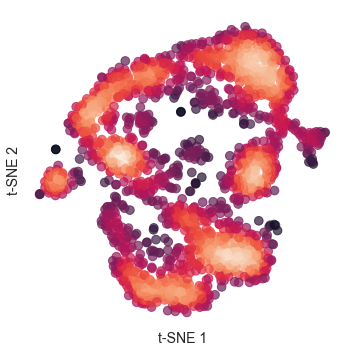

In [73]:
colon1_scVI_tSNE.plot()

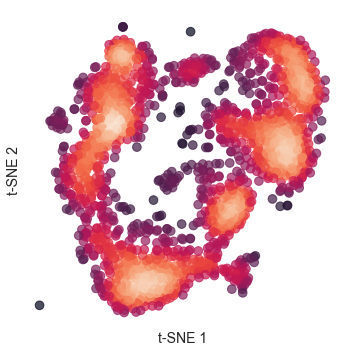

CPU times: user 13.4 s, sys: 440 ms, total: 13.8 s
Wall time: 13.8 s


In [74]:
%%time
colon1_scVI_tSNE = fcc_tSNE(colon1_scVI_preprocessed.arcsinh_norm(), perplexity=30)
colon1_scVI_tSNE.plot()

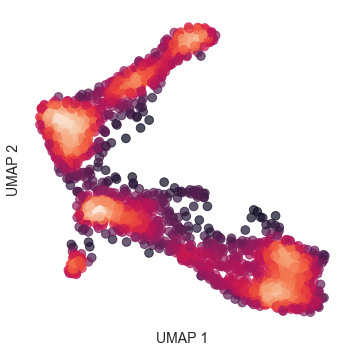

CPU times: user 10.3 s, sys: 586 ms, total: 10.9 s
Wall time: 11.1 s


In [75]:
%%time
colon1_scVI_UMAP = fcc_UMAP(colon1_scVI_preprocessed.arcsinh_norm(), perplexity=30)
colon1_scVI_UMAP.plot()

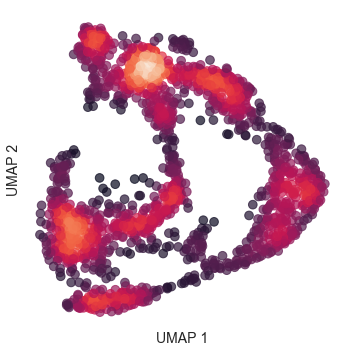

CPU times: user 4.58 s, sys: 255 ms, total: 4.83 s
Wall time: 4.59 s


In [76]:
%%time
colon1_scVI_UMAP = fcc_UMAP(colon1_scVI_PCA.results, perplexity=30)
colon1_scVI_UMAP.plot()

See how this is different (if at all) from variance feature selection to 600 genes.  
That might be all that this did...

In [79]:
colon1 = RNA_counts.from_file('inputs/GSM2743164_rep1_colon_rnaseq.csv.gz', cells_axis=1)

In [83]:
colon1_600genes = RNA_counts.var_select(counts_obj=colon1, n_features=600)

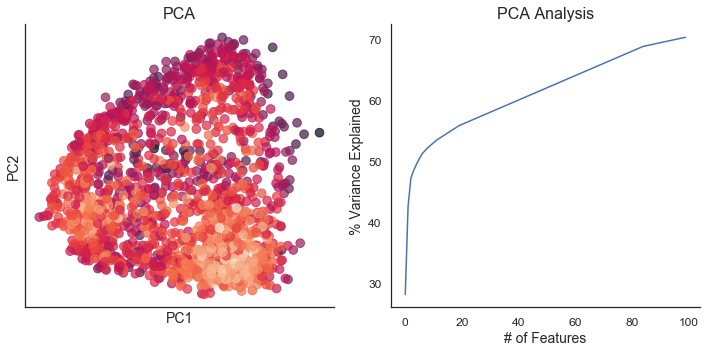

CPU times: user 1.34 s, sys: 135 ms, total: 1.48 s
Wall time: 929 ms


In [84]:
%%time
colon1_600genes_PCA = fcc_PCA(colon1_600genes.arcsinh_norm(), n_components=100)
colon1_600genes_PCA.plot()

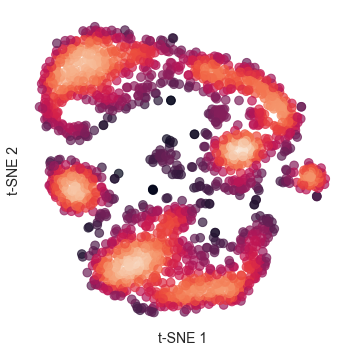

CPU times: user 10.6 s, sys: 415 ms, total: 11 s
Wall time: 10.9 s


In [85]:
%%time
colon1_600genes_tSNE = fcc_tSNE(colon1_600genes_PCA.results, perplexity=30)
colon1_600genes_tSNE.plot()

Okay, these are the same, so scVI just downsampled based on variable genes...

In [86]:
colon1_scVI.X.astype('double')

array([[1.377e+03, 4.220e+02, 6.530e+02, ..., 2.000e+00, 1.000e+00,
        1.000e+00],
       [9.000e+00, 3.000e+00, 2.000e+00, ..., 6.000e+00, 7.000e+00,
        6.000e+00],
       [1.800e+01, 1.000e+01, 5.000e+00, ..., 4.000e+00, 3.000e+00,
        8.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.200e+01, 2.000e+00, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [8.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [87]:
colon1_600genes.counts

array([[1377,  422,  653, ...,    2,    1,    1],
       [   9,    3,    2, ...,    6,    7,    6],
       [  18,   10,    5, ...,    4,    3,    8],
       ...,
       [   0,    0,    0, ...,    1,    0,    0],
       [  12,    2,    0, ...,    1,    0,    0],
       [   8,    1,    0, ...,    0,    0,    0]])

yep.  
  
---

In [8]:
trainer.train_set.raw_data()[0] # I think this is the counts? At least for the training set.

array([[192.,  70.,   0., ...,   5.,   4.,   5.],
       [615., 348., 161., ...,   4.,   4.,   3.],
       [370., 118.,  30., ...,   3.,   1.,   2.],
       ...,
       [ 18.,  13.,   2., ...,   1.,   0.,   1.],
       [  4., 335.,   3., ...,   0.,   2.,   1.],
       [  3.,   0.,   1., ...,   0.,   0.,   2.]], dtype=float32)

In [9]:
colon1_scVI_preprocessed = RNA_counts(data=trainer.train_set.raw_data()[0].astype('double'), labels=[None,None])

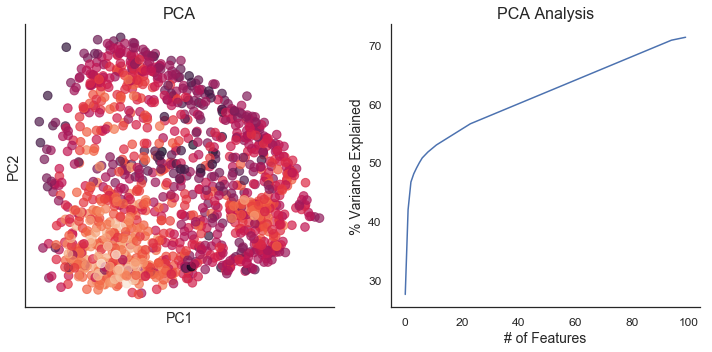

In [10]:
colon1_scVI_PCA = fcc_PCA(colon1_scVI_preprocessed.arcsinh_norm(), n_components=100)
colon1_scVI_PCA.plot()

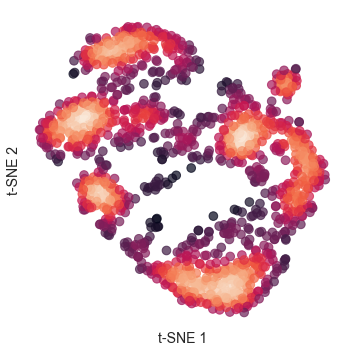

CPU times: user 7.58 s, sys: 65.7 ms, total: 7.65 s
Wall time: 7.51 s


In [11]:
%%time
colon1_scVI_tSNE = fcc_tSNE(colon1_scVI_PCA.results, perplexity=30)
colon1_scVI_tSNE.plot()

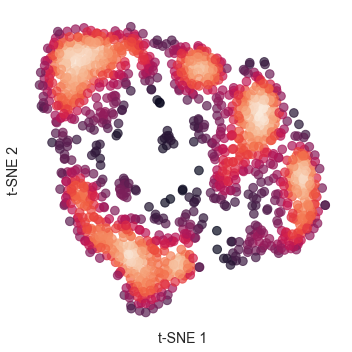

CPU times: user 9.46 s, sys: 81.6 ms, total: 9.54 s
Wall time: 9.37 s


In [12]:
%%time
colon1_scVI_tSNE = fcc_tSNE(colon1_scVI_preprocessed.arcsinh_norm(), perplexity=30)
colon1_scVI_tSNE.plot()

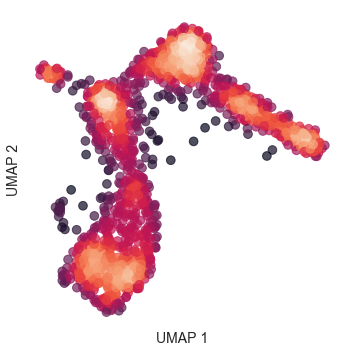

CPU times: user 8.41 s, sys: 268 ms, total: 8.68 s
Wall time: 8.54 s


In [13]:
%%time
colon1_scVI_UMAP = fcc_UMAP(colon1_scVI_preprocessed.arcsinh_norm(), perplexity=30)
colon1_scVI_UMAP.plot()

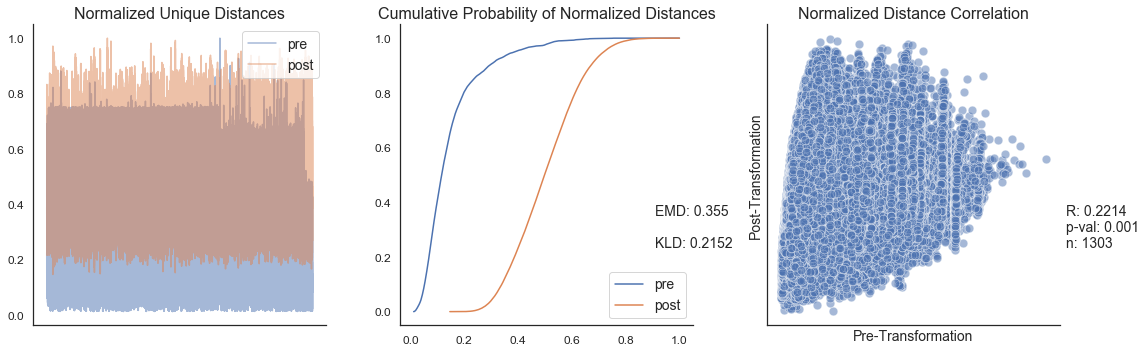

CPU times: user 48 s, sys: 6.65 s, total: 54.6 s
Wall time: 54.3 s


In [16]:
%time mantel, EMD, KLD = compare_euclid(pre=colon1_scVI_preprocessed.distance_matrix(), post=colon1_scVI_PCA.distance_matrix())

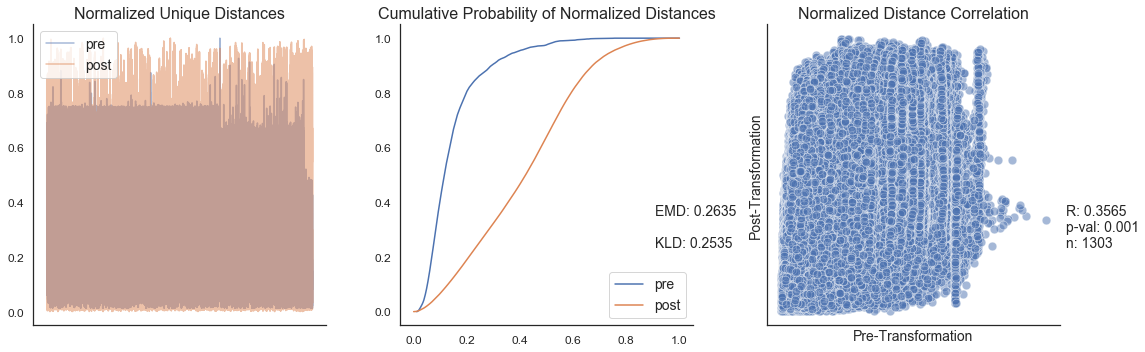

CPU times: user 46.5 s, sys: 5.37 s, total: 51.8 s
Wall time: 51.7 s


In [17]:
%time mantel, EMD, KLD = compare_euclid(pre=colon1_scVI_preprocessed.distance_matrix(), post=colon1_scVI_tSNE.distance_matrix())

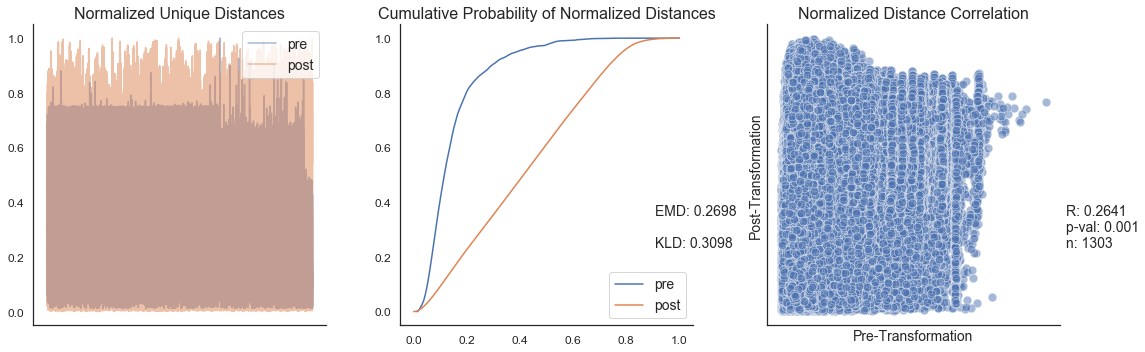

CPU times: user 46.8 s, sys: 6.98 s, total: 53.8 s
Wall time: 53.1 s


In [18]:
%time mantel, EMD, KLD = compare_euclid(pre=colon1_scVI_preprocessed.distance_matrix(), post=colon1_scVI_UMAP.distance_matrix())